In [1]:
# Reddit data analysis 
import html
import json
import string
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.collocations import *
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# First collect the data in json-file 
fjson = 'raw_post_comment_data.json'

In [3]:
# read json file with collected posts and comments
with open(fjson) as file:
    data = json.load(file)
len(data)

500

In [4]:
# data record example
data[0]

{'id': 'wbjii0',
 'title': 'Daily General Discussion - July 30, 2022 (GMT+0)',
 'text': '**Welcome to the Daily General Discussion thread. Please read the disclaimer and rules before participating.**\n \n***\n&nbsp;\n    \n###Disclaimer:\n\nConsider all information posted here with several liberal heaps of salt, and always cross check any information you may read on this thread with known sources. Any trade information posted in this open thread may be highly misleading, and could be an attempt to manipulate new readers by known "pump and dump (PnD) groups" for their own profit. BEWARE of such practices and exercise utmost caution before acting on any trade tip mentioned here. \n\n\n**Please be careful about what information you share and the actions you take.** Do not share the amounts of your portfolios (why not just share percentage?). Do not share your private keys or wallet seed. Use strong, non-SMS 2FA if possible. Beware of scammers and be smart. Do not invest more than you can 

In [5]:
# create pandas dataframe from post titles
df_posts = pd.DataFrame([p['title'] for p in data], columns=['title'])
df_posts

,title
0,"Daily General Discussion - July 30, 2022 (GMT+0)"
1,r/CryptoCurrency Predictions Tournament
2,Why is crypto going up after the news of being...
3,Robinhood steals from the poor and gives to th...
4,You wont realize why you really need crypto un...
...,...
495,‎The Daily: Death of a Crypto Company on Apple...
496,"Martin Shkreli Launches Druglike, Chipotle Giv..."
497,Buyer Beware: NFT Gaming Projects Flock to the...
498,Elon Musk’s Tesla Still Holds $222M in Digital...


In [6]:
# add columns from other data fields: combining comment and sub-comment text
df_posts['post_id'] = [p['id'] for p in data]
df_posts['text'] = [p['text'] for p in data]
df_posts['comments_lev1'] = [' '.join(p['comments_lev1']) for p in data]
df_posts['comments_lev2'] = [' '.join(p['comments_lev2']) for p in data]
df_posts

,title,post_id,text,comments_lev1,comments_lev2
0,"Daily General Discussion - July 30, 2022 (GMT+0)",wbjii0,**Welcome to the Daily General Discussion thre...,One day Bitcoin is gonna allow me to give up w...,Same 😔 Never gonna happen for me. It's sad but...
1,r/CryptoCurrency Predictions Tournament,wbca4l,,**Welcome to another r/CryptoCurrency Predicti...,Don't we all Good luck everyone! You'll will i...
2,Why is crypto going up after the news of being...,wb28x2,The markets are definitely behaving in mysteri...,The market was expecting a recession confirmat...,My personal strategy is to just buy every time...
3,Robinhood steals from the poor and gives to th...,wbdpcf,"Robinhood, the app, quite literally takes from...",“Too young to know the story of Robinhood”\n\n...,"Was thinking the same, OP should forget Crypto..."
4,You wont realize why you really need crypto un...,wbeqvt,Used to be a crypto critic but kind of thinkin...,This seems way more about the chaotic way you ...,Lol. I was reading this thinking WTH kinda dum...
...,...,...,...,...,...
495,‎The Daily: Death of a Crypto Company on Apple...,w8lgag,,"I actually listen to it yesterday, it was pret...",In the middle of it right now. That Daily has ...
496,"Martin Shkreli Launches Druglike, Chipotle Giv...",w8l8y2,,Martin Shkreli could eat a dick I wonder if th...,If you told me in 2017 that in 2022 Shkreli wo...
497,Buyer Beware: NFT Gaming Projects Flock to the...,w8kuos,,Not a fan of this project but XRPL as a L1 is ...,
498,Elon Musk’s Tesla Still Holds $222M in Digital...,w81dpj,,Bitcoin [pros](/r/CryptoCurrency/comments/w81d...,* Relevant Cointest topics: [Bitcoin Cash](htt...


In [7]:
# text cleaning function
stop_words = set(stopwords.words('english'))

def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    
    # return clean string
    return ' '.join(wt_filt)

In [8]:
# add clean text column with combined comments of both levels
df_posts['text_clean'] = (df_posts['text'] + df_posts['comments_lev1'] + df_posts['comments_lev2']).apply(text_cleanup)
df_posts

,title,post_id,text,comments_lev1,comments_lev2,text_clean
0,"Daily General Discussion - July 30, 2022 (GMT+0)",wbjii0,**Welcome to the Daily General Discussion thre...,One day Bitcoin is gonna allow me to give up w...,Same 😔 Never gonna happen for me. It's sad but...,welcome daily general discussion thread please...
1,r/CryptoCurrency Predictions Tournament,wbca4l,,**Welcome to another r/CryptoCurrency Predicti...,Don't we all Good luck everyone! You'll will i...,welcome another predictions tournament please ...
2,Why is crypto going up after the news of being...,wb28x2,The markets are definitely behaving in mysteri...,The market was expecting a recession confirmat...,My personal strategy is to just buy every time...,markets definitely behaving mysterious ways la...
3,Robinhood steals from the poor and gives to th...,wbdpcf,"Robinhood, the app, quite literally takes from...",“Too young to know the story of Robinhood”\n\n...,"Was thinking the same, OP should forget Crypto...",robinhood app quite literally takes poor gives...
4,You wont realize why you really need crypto un...,wbeqvt,Used to be a crypto critic but kind of thinkin...,This seems way more about the chaotic way you ...,Lol. I was reading this thinking WTH kinda dum...,used crypto critic kind thinking cool serious ...
...,...,...,...,...,...,...
495,‎The Daily: Death of a Crypto Company on Apple...,w8lgag,,"I actually listen to it yesterday, it was pret...",In the middle of it right now. That Daily has ...,actually listen yesterday pretty good covered ...
496,"Martin Shkreli Launches Druglike, Chipotle Giv...",w8l8y2,,Martin Shkreli could eat a dick I wonder if th...,If you told me in 2017 that in 2022 Shkreli wo...,martin shkreli could eat dick wonder kind head...
497,Buyer Beware: NFT Gaming Projects Flock to the...,w8kuos,,Not a fan of this project but XRPL as a L1 is ...,,fan project xrpl l1 likely end massive chunk g...
498,Elon Musk’s Tesla Still Holds $222M in Digital...,w81dpj,,Bitcoin [pros](/r/CryptoCurrency/comments/w81d...,* Relevant Cointest topics: [Bitcoin Cash](htt...,bitcoin pros cons related info collapsed comme...


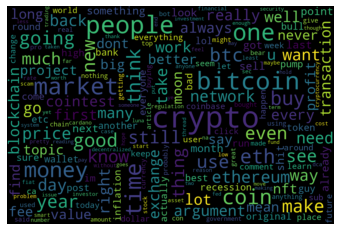

In [9]:
# most common keywords
text_combined = ' '.join(df_posts['text_clean'])
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(text_combined)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

In [10]:
# extract keyword counts
kwords = WordCloud().process_text(text_combined)
kwords

{'welcome': 49,
 'daily': 141,
 'general': 18,
 'please': 79,
 'read': 227,
 'participating': 2,
 'consider': 42,
 'information': 94,
 'posted': 29,
 'several': 50,
 'salt': 2,
 'always': 285,
 'cross': 10,
 'check': 143,
 'may': 298,
 'known': 39,
 'trade': 211,
 'open': 112,
 'misleading': 7,
 'attempt': 19,
 'manipulate': 8,
 'new': 785,
 'pump': 476,
 'dump': 240,
 'profit': 405,
 'tip': 7,
 'mentioned': 34,
 'careful': 29,
 'share': 136,
 'take': 529,
 'percentage': 4,
 'private': 32,
 'wallet': 356,
 'use': 750,
 'strong': 90,
 '2fa': 5,
 'possible': 154,
 'invest': 259,
 'afford': 18,
 'lose': 170,
 'fall': 114,
 'unrealistic': 4,
 'common': 32,
 'sub': 401,
 'apply': 20,
 'karma': 19,
 'age': 9,
 'longer': 13,
 'effect': 47,
 'must': 139,
 'cryptocurrency': 88,
 'behave': 12,
 'language': 3,
 'first': 232,
 'useful': 92,
 'beginner': 1,
 'page': 20,
 'discord': 14,
 'link': 97,
 'join': 26,
 'meta': 79,
 'regarding': 34,
 'whether': 63,
 'moon': 308,
 'governance': 54,
 'findin

In [11]:
# transform that dictionary into a pandas DataFrame
df_kwords = pd.DataFrame(list(kwords.items()), columns=['keyword', 'count']).set_index('keyword')
df_kwords

,count
keyword,
welcome,49
daily,141
general,18
please,79
read,227
...,...
fellow filipinos,2
revenue stream,3
posted post,6


<AxesSubplot:xlabel='keyword'>

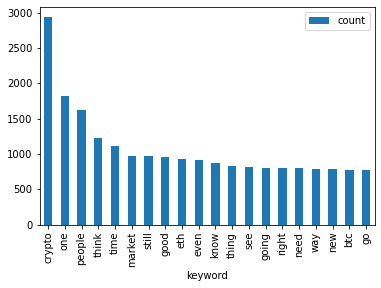

In [12]:
# ploting a bar chart with the top keywords
%matplotlib inline
df_kwords.sort_values(by='count', ascending=False).head(20).plot.bar()

In [13]:
# NLTK collocations search (words occuring together): bigrams
bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents([d.split() for d in df_posts['text_clean']])

In [14]:
# filtering out bigrams occurring less than three times in the combined text
bigram_finder.apply_freq_filter(3)

In [15]:
# list of bigrams with their frequencies
bigram_freq = list(bigram_finder.ngram_fd.items())
bigram_freq

[(('welcome', 'daily'), 6),
 (('daily', 'general'), 11),
 (('general', 'discussion'), 11),
 (('discussion', 'thread'), 161),
 (('thread', 'please'), 5),
 (('please', 'read'), 5),
 (('read', 'disclaimer'), 5),
 (('disclaimer', 'rules'), 5),
 (('rules', 'participating'), 5),
 (('participating', 'disclaimer'), 5),
 (('disclaimer', 'consider'), 5),
 (('consider', 'information'), 5),
 (('information', 'posted'), 10),
 (('posted', 'several'), 5),
 (('several', 'liberal'), 5),
 (('liberal', 'heaps'), 5),
 (('heaps', 'salt'), 5),
 (('salt', 'always'), 5),
 (('always', 'cross'), 5),
 (('cross', 'check'), 5),
 (('check', 'information'), 7),
 (('information', 'may'), 7),
 (('may', 'read'), 5),
 (('read', 'thread'), 6),
 (('thread', 'known'), 5),
 (('known', 'sources'), 5),
 (('sources', 'trade'), 5),
 (('trade', 'information'), 6),
 (('posted', 'open'), 5),
 (('open', 'thread'), 5),
 (('thread', 'may'), 5),
 (('may', 'highly'), 6),
 (('highly', 'misleading'), 6),
 (('misleading', 'could'), 5),
 (

In [16]:
# collecting into a pandas dataframe
df_freq = pd.DataFrame([(' '.join(k), v) for k,v in bigram_freq], columns=['keyphrase', 'count'])
df_freq.sort_values(by='count', ascending=False, inplace=True)
df_freq.set_index('keyphrase', inplace = True)
df_freq

,count
keyphrase,
gon na,330
would like,328
pros cons,308
cointest archive,288
arguments topic,288
...,...
2021 8,3
crypto treated,3
30 profit,3


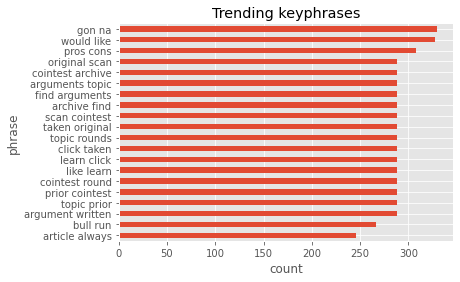

In [17]:
plt.style.use('ggplot')

# rendering a horizontal bar graph
df_freq.head(20).sort_values(by='count').plot(kind = 'barh')
plt.title('Trending keyphrases')
plt.ylabel('phrase')
plt.xlabel('count')
plt.legend().set_visible(False)
plt.show()

Conclusion: 
Finally, we got to know the trending keyphrases for our Reddit data analysis for a sub-Reddit category of cryptocurrency. 